In [51]:
!git clone https://github.com/Saatwik-M/Artificial-Neural-Networks.git
  

fatal: destination path 'Artificial-Neural-Networks' already exists and is not an empty directory.


In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [53]:
data = pd.read_csv("Artificial-Neural-Networks/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
#train and test values
X= data.iloc[:,3:-1]
y= data.iloc[:,-1]

In [56]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [57]:
#categorial variables convert 
pd.get_dummies(X).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [58]:
pd.get_dummies(X,drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [0]:
X=pd.get_dummies(X,drop_first=True)

In [0]:
#X.head()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [0]:
sc= StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
clf = Sequential()

In [0]:
clf.add(Dense(units= 6, activation='relu', input_dim=11))
clf.add(Dropout(0.2))
clf.add(Dense(units= 6, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units= 1, activation='sigmoid'))
#for regression no need last layer 
clf.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
m=clf.fit(X_train,y_train, batch_size=32, epochs=100, validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 1s 208us/step - loss: 0.6022 - acc: 0.7179 - val_loss: 0.5033 - val_acc: 0.8063
Epoch 2/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.5314 - acc: 0.7919 - val_loss: 0.4732 - val_acc: 0.8063
Epoch 3/100
7200/7200 [==============================] - 1s 105us/step - loss: 0.5038 - acc: 0.7943 - val_loss: 0.4583 - val_acc: 0.8063
Epoch 4/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4864 - acc: 0.7961 - val_loss: 0.4469 - val_acc: 0.8063
Epoch 5/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4774 - acc: 0.7965 - val_loss: 0.4396 - val_acc: 0.8063
Epoch 6/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.4740 - acc: 0.7965 - val_loss: 0.4346 - val_acc: 0.8063
Epoch 7/100
7200/7200 [==============================] - 1s 103us/step - loss: 0.4644 - acc: 0.7964 - val_loss: 0.4293 - val_acc: 0

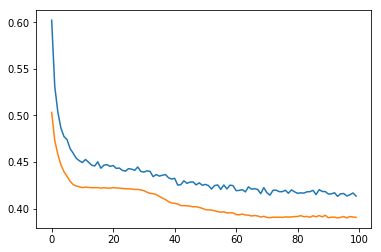

In [68]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

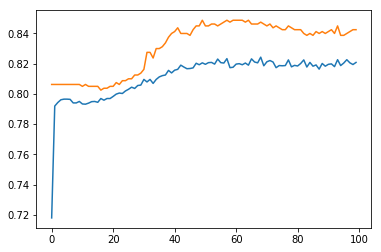

In [69]:
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])

In [70]:
score= clf.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 40us/step


In [71]:
score

[0.4018307914733887, 0.829]

In [75]:
sum(y_train == 0)

6382

In [76]:
sum(y_test == 1)

419